Explored the dataset, manipulated it, and then I trained the data set. I also optimized the model to get it better slighly better and below 7 RMSE as the challenged demanded. The optimized model had a R2 score of 0.678, which means that the independant variables in the model explained 67.8% of the variance in the independent variables. 

I also tried RandomForestRegressor and got a roughly the same result as the optimized GradientBoostRegressor model. 

With these two models I predicted the price per unit of two transactions.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score





In [2]:
RE_data = pd.read_excel('Real estate.xlsx')
RE_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
RE_data = RE_data.drop(columns='No')
RE_data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
RE_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [5]:
RE_data.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<bound method Figure.show of <Figure size 720x288 with 1 Axes>>

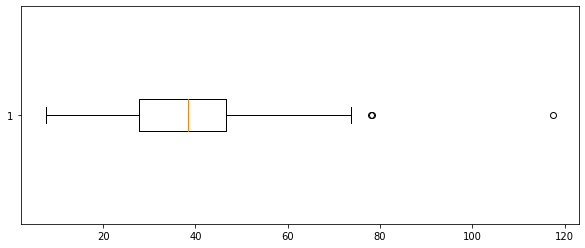

In [6]:
fig = plt.figure(figsize=(10,4))
plt.boxplot(RE_data['Y house price of unit area'],vert=False)
fig.show

In [7]:
X, y = RE_data[['X1 transaction date','X2 house age',
               'X3 distance to the nearest MRT station',
               'X4 number of convenience stores',
               'X5 latitude','X6 longitude']
              ].values,RE_data['Y house price of unit area'].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=0)
print('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0],X_test.shape[0]))

Training Set: 289 rows
Test Set: 125 rows


In [8]:
model = GradientBoostingRegressor().fit(X_train,y_train)
print(model, '\n')

predictions= model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print('MSE:',mse)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2=r2_score(y_test,predictions)
print('R2:',r2)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 61.76608002247718
RMSE: 7.8591399034803535
R2: 0.6375745268320706


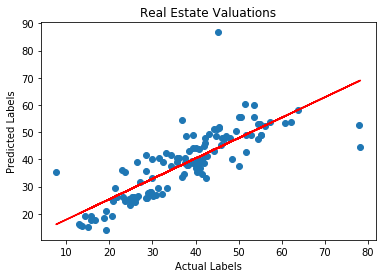

In [9]:
plt.scatter(y_test,predictions)
plt.xlabel("Actual Labels")
plt.ylabel('Predicted Labels')
plt.title('Real Estate Valuations')

z=np.polyfit(y_test,predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test),color='red')
plt.show()


In [10]:
#Making the model better

alg=GradientBoostingRegressor()

params={
    'learning_rate':[0.1,0.5,1.0],
    'n_estimators':[50,100,150]
}
score=make_scorer(r2_score)
gridsearch = GridSearchCV(alg,params,scoring=score,cv=3,return_train_score=True)
gridsearch.fit(X_train,y_train)
print('The best parameter combination is:',gridsearch.best_params_,'\n')

The best parameter combination is: {'learning_rate': 0.1, 'n_estimators': 50} 



In [11]:
model=gridsearch.best_estimator_
print(model,'\n')

predictions= model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print('MSE:',mse)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2=r2_score(y_test,predictions)
print('R2:',r2)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 60.04851251542594
RMSE: 7.749097529094981
R2: 0.6476527156407885


In [12]:
Forest_model = RandomForestRegressor().fit(X_train,y_train)
print(model, '\n')

predictions= Forest_model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print('MSE:',mse)
rmse=np.sqrt(mse)
print('RMSE:',rmse)
r2=r2_score(y_test,predictions)
print('R2:',r2)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False) 

MSE: 59.300593909098666
RMSE: 7.700687885448849
R2: 0.6520412854624548


In [13]:
import joblib
filename = './Real-Estate-Valuation-model.pkl'
joblib.dump(model, filename)
filename_Forest = './Real-Estate-Valuation-Forestmodel.pkl'
joblib.dump(Forest_model, filename_Forest)

['./Real-Estate-Valuation-Forestmodel.pkl']

In [16]:
#Gradient Regressor model
loaded_model = joblib.load(filename)

X_new1 = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348]]).astype('float64')
X_new2 = np.array([[2013.000,13.6,4082.015,0,24.94155,121.50381]]).astype('float64')
print ('1st Transaction:{}'.format(list(X_new1[0])))
print('2nd Transaction:{}'.format(list(X_new2[0])))


result1 = loaded_model.predict(X_new1)
result2 = loaded_model.predict(X_new2)
print('Prediction: Price per unit for the 1st Transaction will be {:.0f} '.format(np.round(result1[0])))
print('Prediction: Price per unit for the 2nd Transaction will be {:.0f} '.format(np.round(result2[0])))

1st Transaction:[2013.167, 16.2, 289.3248, 5.0, 24.98203, 121.54348]
2nd Transaction:[2013.0, 13.6, 4082.015, 0.0, 24.94155, 121.50381]
Prediction: Price per unit for the 1st Transaction will be 48 
Prediction: Price per unit for the 2nd Transaction will be 17 


In [17]:
#Random Forest Regressor model
loaded_model1 = joblib.load(filename_Forest)

X_new1 = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348]]).astype('float64')
X_new2 = np.array([[2013.000,13.6,4082.015,0,24.94155,121.50381]]).astype('float64')
print ('1st Transaction:{}'.format(list(X_new1[0])))
print('2nd Transaction:{}'.format(list(X_new2[0])))


result1 = loaded_model1.predict(X_new1)
result2 = loaded_model1.predict(X_new2)
print('Prediction: Price per unit for the 1st Transaction will be {:.0f} '.format(np.round(result1[0])))
print('Prediction: Price per unit for the 2nd Transaction will be {:.0f} '.format(np.round(result2[0])))

1st Transaction:[2013.167, 16.2, 289.3248, 5.0, 24.98203, 121.54348]
2nd Transaction:[2013.0, 13.6, 4082.015, 0.0, 24.94155, 121.50381]
Prediction: Price per unit for the 1st Transaction will be 49 
Prediction: Price per unit for the 2nd Transaction will be 16 
